**PySpark no Google Colab**

In [1]:
# instalar as dependências
# baixando a versão mais recente do java8;
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#download via stp do hadoop
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
#extraindo o arquivo tgz
!tar xf /content/spark-3.3.1-bin-hadoop3.tgz
#instalando o  Findspark que é responsavel para que as variáveis ​​do ambiente sejam definidas corretamente e o pyspark seja importado.
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

# utilizando o findspark para que o pyspark seja "importável"
import findspark
findspark.init('spark-3.3.1-bin-hadoop3')

**SparkSession**

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.read.csv(path='/mnt/clientes_to_distinct_1.CSV',sep=';',header='true')

df.show()

+----------+----------+--------+
|cliente_id|nm_cliente| salario|
+----------+----------+--------+
|         1| guilherme|71993.34|
|         1| guilherme|34812.34|
|         1| guilherme|13884.47|
|         2| guilherme|88561.84|
|         2|     vitor|32141.87|
|         3|    kelvin|52535.62|
|         4|   rogerio|22055.04|
|         4|   rogerio|14216.09|
+----------+----------+--------+



**.distinct()**

É um metodo do dataframe que retornará um novo dataframe contendo apenas as linhas distintas baseando-se em todas as colunas do dataframe.

Não há possibilidade de passar por argumentos quais as colunas que você deseja que ele restrinja ao aplicar o distinct.

Então **todas as colunas do dataframe são consideradas** ao descartar os dados duplicados.

In [10]:
df.distinct().show()

+----------+----------+--------+
|cliente_id|nm_cliente| salario|
+----------+----------+--------+
|         1| guilherme|34812.34|
|         3|    kelvin|52535.62|
|         1| guilherme|71993.34|
|         2| guilherme|88561.84|
|         1| guilherme|13884.47|
|         4|   rogerio|22055.04|
|         2|     vitor|32141.87|
|         4|   rogerio|14216.09|
+----------+----------+--------+



O problema disso...

É que ele limitará nosso dataframe de retorno eliminando as outras colunas do dataframe de origem ao aplicar a remoção das duplicatas...


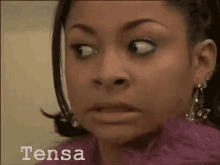

porém...

A galera que desenvolveu a Apache spark colocou outro método no dataframe que permite que opcionalmente considere algumas colunas ao remover as duplicatas.

.dropDuplicates()

Descartará as duplicatas encontradas no dataframe baseando-se nas colunas parametrizadas (opcionalmente) e retornará todas as colunas do dataframe original.


In [14]:
df.dropDuplicates(['cliente_id','nm_cliente']).show()

+----------+----------+--------+
|cliente_id|nm_cliente| salario|
+----------+----------+--------+
|         1| guilherme|71993.34|
|         2| guilherme|88561.84|
|         2|     vitor|32141.87|
|         3|    kelvin|52535.62|
|         4|   rogerio|22055.04|
+----------+----------+--------+

